In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:

over_50 = df[df['age'] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


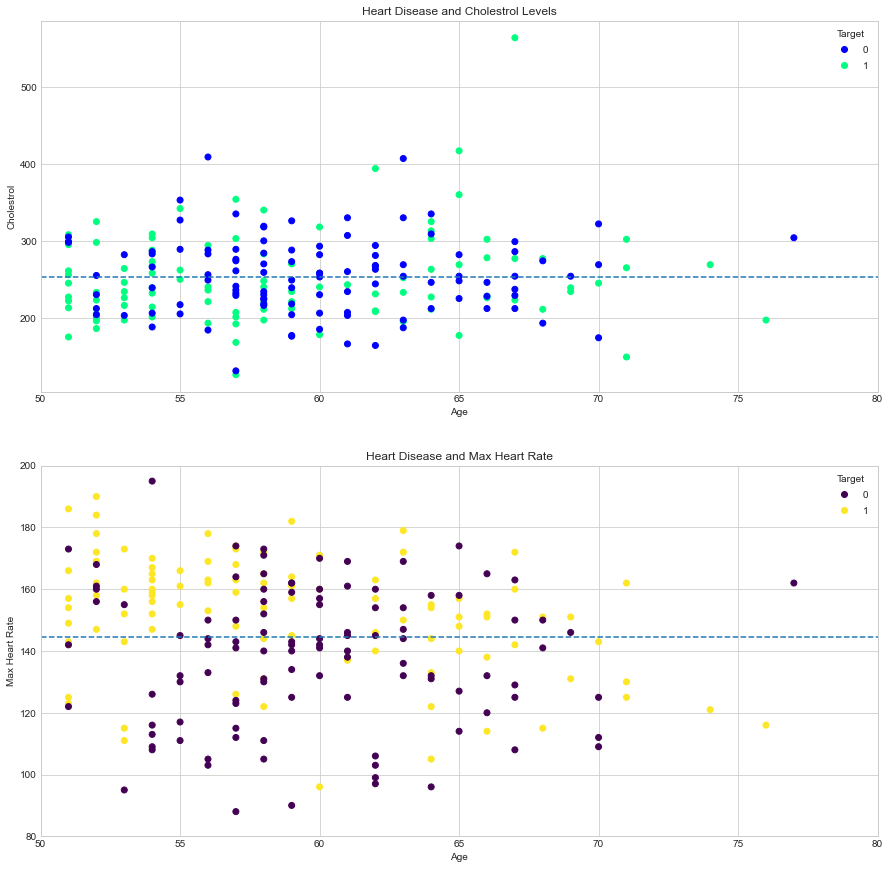

In [7]:
plt.style.use('seaborn-whitegrid')

fig, (ax0 , ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(15,15))
# axis 0

scatter = ax0.scatter(x=over_50['age'],
                      y=over_50['chol'],
                      c=over_50['target'],
                      cmap='winter');

ax0.set(title="Heart Disease and Cholestrol Levels",
        xlabel="Age",
        ylabel="Cholestrol");

ax0.set_xlim([50,80]);

ax0.legend(*scatter.legend_elements(),title="Target");

ax0.axhline(y=over_50['chol'].mean(),
            linestyle='--');

#axis 1

scatter = ax1.scatter(x=over_50['age'],
                      y=over_50['thalach'],
                      c=over_50['target'],
                      cmap='viridis');

ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate");

ax1.set_xlim([50,80]);

ax1.set_ylim([80,200]);

ax1.legend(*scatter.legend_elements(),title="Target");

ax1.axhline(y=over_50['thalach'].mean(),
            linestyle='--');



Machine Learning Model


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

NameError: name 'sns' is not defined

<Figure size 1080x720 with 0 Axes>

In [10]:
# Importing the RandomForestClassifier Estimator
from sklearn.ensemble import RandomForestClassifier

#Setting up the random seed
np.random.seed(42)

#Preparing the data
X = df.drop("target",axis=1)
y = df["target"]

#Spliting the data

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiating RandomForestClassifier 
model = RandomForestClassifier(n_estimators=60)
model.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
np.array(cross_val_score(model,X,y,cv=5)).mean()*100

82.16393442622952

In [11]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

###### COMPARING THE PREDICTIONS TO THE TRUTH LABELS TO EVALUATE THE MODEL

In [13]:
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

#### EVALUATING USING ACCURACY SCORE

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.8524590163934426

#### EVALUATING USING ROC CURVE


In [15]:
from sklearn.metrics import roc_curve

y_probs = model.predict_proba(X_test)

y_probs[:10] , len (y_probs)

(array([[0.88333333, 0.11666667],
        [0.46666667, 0.53333333],
        [0.45      , 0.55      ],
        [0.81666667, 0.18333333],
        [0.18333333, 0.81666667],
        [0.16666667, 0.83333333],
        [0.33333333, 0.66666667],
        [0.95      , 0.05      ],
        [0.98333333, 0.01666667],
        [0.43333333, 0.56666667]]),
 61)

In [16]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11666667, 0.53333333, 0.55      , 0.18333333, 0.81666667,
       0.83333333, 0.66666667, 0.05      , 0.01666667, 0.56666667])

In [17]:
#CALCULATING FPR , TPR , THRESHOLDS

fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.10344828,
       0.13793103, 0.13793103, 0.17241379, 0.17241379, 0.20689655,
       0.34482759, 0.4137931 , 0.44827586, 0.51724138, 0.62068966,
       0.68965517, 0.86206897, 0.93103448, 1.        ])

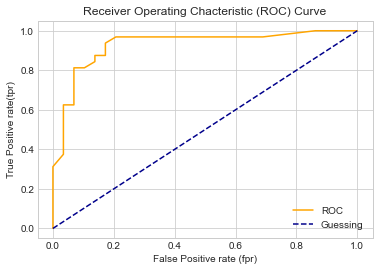

In [18]:
#CREATING A FUNTION FOR PLOTTING THE ROC CURVE

import matplotlib.pyplot as plt


def plot_roc_curve(fpr,tpr):
    """Plots a ROC curve given the false postive rate (fpr)
    and true positive rate (tpr)
    """
    #Plotting the roc curve
    plt.plot(fpr,tpr,color ="orange" , label= "ROC")
    
    #Plotting line with no predictive power(baseline)
    plt.plot([0,1],[0,1] , color="darkblue" , linestyle = "--" , label= "Guessing")
    
    #Customizing the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate(tpr)")
    plt.title("Receiver Operating Chacteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [19]:
#Area Under Curve (AUC) SCORE

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9283405172413792

#### EVALUATING USING CONFUSION MATRIX

A Confusion Matrix is the quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence , giving an idea where the model is getting confused.

In [20]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_preds)

conf_mat

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [21]:
#Visualizing Confusion Matrix using pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [22]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



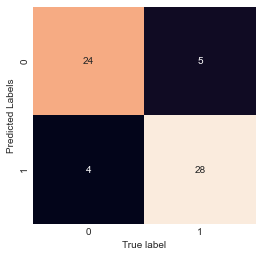

In [23]:
#Making a Confusion Matrix using Seaborn library

import seaborn as sns

def plot_conf_mat(conf_mat):
    fig, ax =plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted Labels")
    
plot_conf_mat(conf_mat)    

#### EVALUATING USING CLASSIFICATION REPORT

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#### IMPROVING THE MODEL WITH HYPERPARAMETER TUNING

In [25]:
#Shuffling the data
df_shuffled = df.sample(frac=1)
df_shuffled.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0


####        HYPERPARAMETER TUNING WITH RandomizedSearchCV

In [26]:
#Importing the Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Making a Evaluation function
def evaluate_metrics(y_test,y_preds):
    
    accuracy = accuracy_score(y_test,y_preds)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)
    
    metric_dict = {"accuracy": round(accuracy , 2),
                   "precision" : round(precision , 2),
                   "recall" : round(recall , 2),
                   "f1" : round(f1 , 2)}
    
    print(f"ACCURACY: {accuracy * 100:.2f}%")
    print(f"PRECISION: {precision:.2f}")
    print(f"RECALL: {recall:.2f}")
    print(f"F1 SCORE: {f1:.2f}")
    
    return metric_dict
 
evaluate_metrics(y_test,y_preds)

ACCURACY: 85.25%
PRECISION: 0.85
RECALL: 0.88
F1 SCORE: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

In [27]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000],
        "max_depth" :[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_leaf":[1,2,4],
        "min_samples_split":[2,4,6]}

#Setting up the random seed
np.random.seed(42)

#Splitting data into X and y
X = df_shuffled.drop("target",axis= 1)
y = df_shuffled['target']

#Splitting the data into train and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiating the RandomForestClassifier model
clf = RandomForestClassifier(n_jobs=1)

#Setting up the RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_sample

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000]},
                   verbose=2)

In [29]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10}

In [30]:
#Making Predictions with the Best Hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluating the Predictions
rs_metrics = evaluate_metrics(y_test,rs_y_preds)

ACCURACY: 78.69%
PRECISION: 0.73
RECALL: 0.90
F1 SCORE: 0.81


#### HYPERPARAMETER TUNING WITH GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

grid_2 = {"n_estimators":[200,500,1000],
          "max_depth" :[5],
          "max_features":["auto","sqrt"],
         "min_samples_leaf":[4],
         "min_samples_split":[4,6]}

#Setting up the random seed
np.random.seed(42)

#Splitting data into X and y
X = df_shuffled.drop("target",axis= 1)
y = df_shuffled['target']

#Splitting the data into train and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiating the RandomForestClassifier model
clf = RandomForestClassifier(n_jobs=1)

#Setting up the GridSearchCV

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

gs_clf.fit(X_train,y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [5], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [4, 6],
                         'n_estimators': [200, 500, 1000]},
             verbose=2)

In [32]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 500}

In [33]:
#Making Predictions with the Best Hyperparameters
gs_y_preds = gs_clf.predict(X_test)

#Evaluating the Predictions
gs_metrics = evaluate_metrics(y_test,gs_y_preds)

ACCURACY: 77.05%
PRECISION: 0.71
RECALL: 0.90
F1 SCORE: 0.79


RandomizedSearchCV Results : 
                             ACCURACY : 85.25%

                             PRECISION: 0.81
                            
                             RECALL: 0.94
                            
                             F1 SCORE: 0.87
                   

GridSearchCV Results : ACCURACY: 83.61%
                      
                       PRECISION: 0.80
                      
                       RECALL: 0.90
                      
                       F1 SCORE: 0.85

#### Saving the Machine learning Model

In [34]:
import pickle

pickle.dump(rs_clf , open("rs_random_forest_model.pkl","wb"))

In [47]:
modell = pickle.load(open("rs_random_forest_model.pkl","rb"))

modell.predict(X_test)

modell.score(X_test,y_test)

0.7868852459016393